# Introduction to processing image data

## Computer Vision. Images as Tensors

Computer Vision (CV) is a field that studies how computers can gain some degree of understanding from digital images and/or video. *Understanding* in this definition has a rather broad meaning - it can range from being able to distinguish between a cat and a dog on the picture, to more complex tasks such as describing the image in natural language.

The most common problems of computer vision include:

* **Image Classification** is the simplest task, when we need to classify an image into one of many pre-defined categories, for example, distinguish a cat from a dog on a photograph, or recognize a handwritten digit.

* **Object Detection** is a bit more difficult task, in which we need to find known objects on the picture and localize them, that is, return the **bounding box** for each of recognized objects.

* **Segmentation** is similar to object detection, but instead of giving bounding box we need to return an exact pixel map outlining each of the recognized objects.  

![An image showing how computer vision object detection can be performed with cats, dogs, and ducks.](images/2-image-data-1.png)

Image taken from [CS224d Stanford Course](https://cs224d.stanford.edu/index.html)

We’ll focus on **image classification** task, and how neural networks can be used to solve it. As with any other machine learning tasks, to train a model for classifying images we’ll need a labeled dataset, that is, a large number of images for each of the classes. 


## Images as Tensors

Computer Vision works with Images. As you probably know, images consist of pixels, so they can be thought of as a rectangular collection (array) of pixels.

In the first part of this tutorial, we will deal with handwritten digit recognition. We will use the MNIST dataset, which consists of grayscale images of handwritten digits, 28x28 pixels. Each image can be represented as 28x28 array, and elements of this array would denote intensity of corresponding pixel - either in the scale of range 0 to 1 (in which case floating point numbers are used), or 0 to 255 (integers). A popular python library called `numpy` is often used with computer vision tasks, because it allows to operate with multidimensional arrays effectively.

To deal with color images, we need some way to represent colors. In most cases, we represent each pixel by 3 intensity values, corresponding to Red (R), Green (G) and Blue (B) components. This color encoding is called RGB, and thus color image of size $W\times H$ will be represented as an array of size $3\times H\times W$ (sometimes the order of components might be different, but the idea is the same).

![Grayscale Image](images/2-image-data-2.png) | ![RGB Image](images/2-image-data-3.png)
------|------
5x5 Grayscale Image | 5x5 Color (RGB) Image

Using multi-dimensional arrays to represent images also has an advantage, because we can use an extra dimension to store a sequence of images. For example, to represent a video fragment consisting of 200 frames with 800x600 dimension, we may use the tensor of size 200x3x600x800.

Multi-dimensional arrays are also called **tensors**. Usually, we refer to tensors when we speak about some neural network framework, such as PyTorch. The main difference between tensors in PyTorch and numpy arrays is that tensors support parallel operations on GPU, if it is available. Also, PyTorch offers additional functionality, such as automatic differentiation, when operating on tensors.  

## Import packages and load the MNIST Dataset

In [21]:
import torch
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

PyTorch has a [number of datasets](https://pytorch.org/vision/stable/datasets.html) available right from the library. Here we are using the well-known [MNIST](http://yann.lecun.com/exdb/mnist/) dataset of handwritten digits, available through `torchvison.datasets.MNIST` in PyTorch. The dataset object returns the data in the form of Python Imagine Library (PIL) images, which we convert to tensors by passing a `transform=ToTensor()` parameter. 

When using your own notebooks, you can also experiment with the other built in datasets, in particular [FashionMNIST](https://pytorch.org/vision/stable/datasets.html#fashion-mnist).

In [22]:
train_data = MNIST(root="data", train=True,
                   transform=ToTensor(), download=True)
test_data = MNIST(root="data", train=False,
                  transform=ToTensor(), download=True)


## Visualizing the dataset
Now that we have downloaded the dataset we can visualize some of the digits

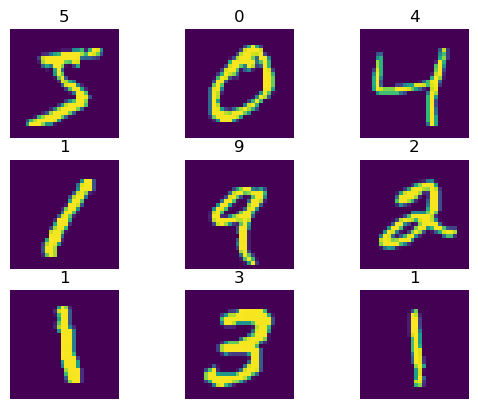

In [23]:
size_plt_grid = 3
fig, axs = plt.subplots(size_plt_grid, size_plt_grid)
for i in range(size_plt_grid):
    for j in range(size_plt_grid):
        axs[i][j].imshow(train_data.data[i*size_plt_grid+j])
        axs[i][j].set_title(train_data.targets[i*size_plt_grid+j].item())
        axs[i][j].set_axis_off()


## Dataset structure

We have a total of 6000 training images and 1000 testing images. Its important to split out the data for training and testing. We also want to do some data exploration to get a better idea of what our data looks like

Each sample is a tuple in the following structure:
 * First element is the actual image of a digit, represented by a tensor of shape 1x28x28
 * Second element is a **label** that specifies which digit is represented by the tensor. It is a tensor that contains a number from 0 to 9.

`data_train` is a training dataset that we will use to train our model on. `data_test` is a smaller test dataset that we can use to verify our model. 

In [24]:
print("Training samples:", len(train_data))
print("Test samples:", len(test_data))

print("Tensor size:", train_data[0][0].shape)
print("First 10 digits are:", [test_data[i][1] for i in range(10)])

print("First element array:", train_data.data[0].numpy())
# Why train_data[0][0] is different from train_data.data[0]
img=Image.fromarray(train_data.data[0].numpy())
print(ToTensor()(img))


Training samples: 60000
Test samples: 10000
Tensor size: torch.Size([1, 28, 28])
First 10 digits are: [7, 2, 1, 0, 4, 1, 4, 9, 5, 9]
First element array: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0  

All pixel intensities of the images are represented by floating-point values in between 0 and 1:

In [25]:
print("Min intensity value:",train_data[0][0].min().item())
print("Max intensity value:",train_data[0][0].max().item())
print(train_data[0][0].size())
print(train_data.data[0].size())

Min intensity value: 0.0
Max intensity value: 1.0
torch.Size([1, 28, 28])
torch.Size([28, 28])


## Loading your own images

In most of the practical applications, you would have your own images located on disk that you want to use to train your neural network. In this case, you need to load them into PyTorch tensors. 

One of the ways to do that is to use one of the Python libraries for image manipulation, such as *Open CV*, or *PIL/Pillow*, or *imageio*. Once you load your image into numpy array, you can easily convert it to tensors. 

> <font color="red">It is important to make sure that all values are scaled to the range [0..1] before you pass them to a neural network - it is the usual convention for data preparation, and all default weight initializations in neural networks are designed to work with this range. </font>`ToTensor` transform that we have seen above automatically scales PIL/numpy images with integer pixel values into [0..1] range.

Even better approach is to use functionality in **Torchvision** library, namely `ImageFolder`. It does all the preprocessing steps automatically, and also assigns labels to images according to the directory structure. We will see the example of using `ImageFolder` later in this course, once we start classifying our own cats and dogs images.

> It is important to note that all images should be scaled to the same size. If your original images have different aspect ratios, you need to decide how to handle this scaling - either by cropping images, or by padding extra space.

## Takeaway

Neural networks work with tensors, and before training any models we need to convert our dataset into a set of tensors. This will be often required. We have loaded training and test datasets, and we are ready to start training our first neural network!

In [26]:
%reset -f

# Training a simple dense neural network

## Training a dense neural network

Let's focus on the problem of handwritten digit recognition. It is a classification problem, because for each input image we need to specify the class - which digit it is.

In this unit, we start with the simplest possible approach for image classification - a fully-connected neural network (which is also called a *perceptron*). We will recap the way neural networks are defined in PyTorch, and how the training algorithm works. If you are familiar with those concepts - feel free to skip to the next unit, where we introduce Convolutional Neural Networks (CNNs).

We use `pytorchcv` helper to load all data we have talked about in the previous unit.

In [27]:
# !wget https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py

In [28]:
import torch
from torch.nn import Module, Sequential, Flatten, ReLU, Linear, CrossEntropyLoss, BatchNorm1d
from torch.optim import Adam
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor, Lambda
from torch.nn.functional import one_hot
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt


In [29]:
device = "cuda" if torch.cuda.is_available() else "cpu"


In [30]:
# hypeparameters
epoches = 1
batch_size = 64
learning_rate = 0.001


In [31]:
def load_data():
    train_data = MNIST(root="data", train=True,
                       transform=ToTensor(), download=True)
    test_data = MNIST(root="data", train=False,
                      transform=ToTensor(), download=True)
    return train_data, test_data


train_data, test_data = load_data()


## Fully-connected dense neural networks

A basic **neural network** in PyTorch consists of a number of **layers**. The simplest network would include just one fully-connected layer, which is called **Linear** layer, with 784 inputs (one input for each pixel of the input image) and 10 outputs (one output for each class).

<img alt="A graph showing how an image is broken into layers based on the pixels." src="images/3-train-dense-neural-networks-1.png" width="60%"/>

As we discussed above, the dimension of our digit images is $1\times28\times28$, i.e. each image contains $28\times28=784$ different pixels. Because linear layer expects its input as one-dimensional vector, we need to insert another layer into the network, called **Flatten**, to change input tensor shape from $1\times28\times28$ to $784$.

After `Flatten`, there is a main linear layer (called `Dense` in PyTorch terminology) that converts 784 inputs to 10 outputs - one per class. We want $n$-th output of the network to return the probability of the input digit being equal to $n$.

Because the output of a fully-connected layer is not normalized to be between 0 and 1, it cannot be thought of as probability. Moreover, if want outputs to be probabilities of different digits, they all need to add up to 1. To turn output vectors into probability vector, a function called **Softmax** is often used as the last activation function in a classification neural network. For example, $\mathrm{softmax}([-1,1,2]) = [0.035,0.25,0.705]$.

> In PyTorch, we often prefer to use **LogSoftmax** function, which will also compute logarithms of output probabilities. To turn the output vector into the actual probabilities, we need to take **torch.exp** of the output. 

Thus, the architecture of our network can be represented by the following sequence of layers:

<img alt="An image showing the architecture of the network broken into a sequence of layers." src="images/3-train-dense-neural-networks-3.png" width="90%"/>

It can be defined in PyTorch in the following way, using `Sequential` syntax:

In [32]:
class FullyConnectedNetwork(Module):
    def __init__(self) -> None:
        super().__init__()
        self.flatten = Flatten()
        self.linear_relu_stack = Sequential(
            Linear(in_features=28*28, out_features=250),
            ReLU(),
            BatchNorm1d(num_features=250),
            Linear(in_features=250, out_features=50),
            ReLU(),
            BatchNorm1d(num_features=50),
            Linear(in_features=50, out_features=10),
            ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


## Training the network

To train the model we will need to create **batches** from our dataset of a certain size. PyTorch has an object called **DataLoader** that can create batches of our data for us automatically:

In [33]:
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size)


The training process steps are as follows:

1. We take a minibatch from the input dataset, which consists of input data (features) and expected result (label).
2. We calculate the predicted result for this minibatch. 
3. The difference between this result and expected result is calculated using a special function called the **loss function**. Loss function shows how different the output of the network is from the expected output. The goal of our training is to minimize the loss. 
4. We calculate the gradients of this loss function with respect to model weights (parameters), which are then used to adjust the weights to optimize the performance of the network. The amount of adjustment is controlled by a parameter called **learning rate**, and the details of optimization algorithm are defined in the **optimizer** object.
5. We repeat those steps until the whole dataset is processed. One complete pass through the dataset is called **an epoch**. 

Here is a function that performs one epoch training: 

In [34]:
loss_fn=CrossEntropyLoss()

In [35]:
model=FullyConnectedNetwork().to(device)

In [36]:
optimizer=Adam(model.parameters(),lr=learning_rate)

Epoch 0
--------
loss:2.362266 [0/60000]
loss:0.385386 [6400/60000]
loss:0.197098 [12800/60000]
loss:0.158878 [19200/60000]
loss:0.149606 [25600/60000]
loss:0.131324 [32000/60000]
loss:0.467448 [38400/60000]
loss:0.135259 [44800/60000]
loss:0.085695 [51200/60000]
loss:0.037250 [57600/60000]
Test Error: 
 Accuracy: 0.961700, Avg loss: 0.001889 



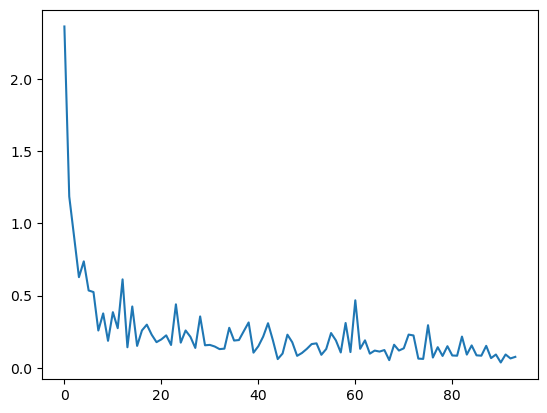

In [37]:
losses = []
for epoch in range(epoches):
    print("Epoch %d" % epoch)
    print("--------")
    size_train_data = len(train_dataloader.dataset)
    for num_batch, (x, y) in enumerate(train_dataloader):
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        pred = model(x)
        loss = loss_fn(pred, y)
        loss.backward()
        optimizer.step()

        loss_float = loss.item()
        if num_batch % 100 == 0:
            current = num_batch*batch_size
            print("loss:%f [%d/%d]" % (loss_float, current, size_train_data))
        if (num_batch % 10 == 0):
            losses.append(loss_float)

    size_test_data = len(test_dataloader.dataset)
    test_loss, accuracy = 0, 0
    for (x, y) in test_dataloader:
        x, y = x.to(device), y.to(device)
        pred = model(x)
        loss = loss_fn(pred, y)
        test_loss += loss.item()
        pred = torch.softmax(pred, dim=1)
        accuracy += (pred.argmax(dim=1) ==
                     y).type(torch.float).sum().item()

    test_loss /= size_test_data
    accuracy /= size_test_data
    print("Test Error: \n Accuracy: %f, Avg loss: %f \n" %
          (accuracy, test_loss))

plt.plot(np.squeeze(losses))


In [38]:
model=FullyConnectedNetwork()

In [39]:
for (x,y) in test_dataloader:
    y_pred=model(x)
    y_pred=torch.softmax(y_pred,dim=1)
    print("The prediction for the first batch of test dataset:",y_pred.argmax(1))
    print("The label for the first batch of test dataset:",y)
    break
    

The prediction for the first batch of test dataset: tensor([8, 1, 3, 4, 1, 1, 0, 7, 3, 8, 1, 2, 0, 5, 5, 2, 0, 7, 1, 0, 4, 3, 6, 7,
        5, 1, 9, 3, 2, 4, 9, 6, 8, 1, 9, 5, 7, 4, 2, 6, 3, 4, 6, 7, 8, 3, 5, 4,
        9, 6, 7, 6, 7, 2, 6, 6, 3, 5, 9, 1, 6, 6, 0, 8])
The label for the first batch of test dataset: tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3])


In [40]:
%reset -f

# Use a convolutional neural network

## Convolutional neural networks

In the previous unit we have learned how to define a multi-layered neural network using class definition, but those networks were generic, and not specialized for computer vision tasks. In this unit we will learn about **Convolutional Neural Networks (CNNs)**, which are specifically designed for computer vision.

Computer vision is different from generic classification, because when we are trying to find a certain object in the picture, we are scanning the image looking for some specific **patterns** and their combinations. For example, when looking for a cat, we first may look for horizontal lines, which can form whiskers, and then certain combination of whiskers can tell us that it is actually a picture of a cat. Relative position and presence of certain patterns is important, and not their exact position on the image. 

To extract patterns, we will use the notion of **convolutional filters**. But first, let us load all dependencies and functions that we have defined in the previous units.

In [41]:
import torch
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torch.nn import Module, Sequential, Conv2d, Flatten, Linear, ReLU, BatchNorm1d, CrossEntropyLoss
from torch.optim import Adam

import matplotlib.pyplot as plt
import numpy as np


In [42]:
train_data = MNIST(root="data", train=True,
                   transform=ToTensor(), download=True)
test_data = MNIST(root="data", train=False,
                  transform=ToTensor(), download=True)


## Visualizing the dataset
Now that we have downloaded the dataset we can visualize some of the digits

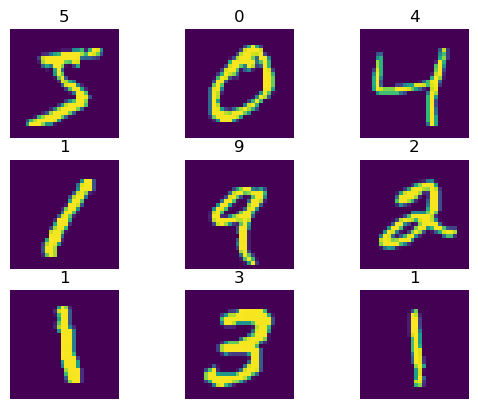

In [43]:
size_plt_grid = 3
fig, axs = plt.subplots(size_plt_grid, size_plt_grid)
for i in range(size_plt_grid):
    for j in range(size_plt_grid):
        axs[i][j].imshow(train_data.data[i*size_plt_grid+j])
        axs[i][j].set_title(train_data.targets[i*size_plt_grid+j].item())
        axs[i][j].set_axis_off()


## Convolutional filters

Convolutional filters are small windows that run over each pixel of the image and compute weighted average of the neighboring pixels.

<img alt="Sliging window over 28x28 digit image" src="images/4-convolutional-networks-1.png" width="50%"/>

They are defined by matrices of weight coefficients. Let's see the examples of applying two different convolutional filters over our MNIST handwritten digits:

torch.Size([1, 1, 28, 28])


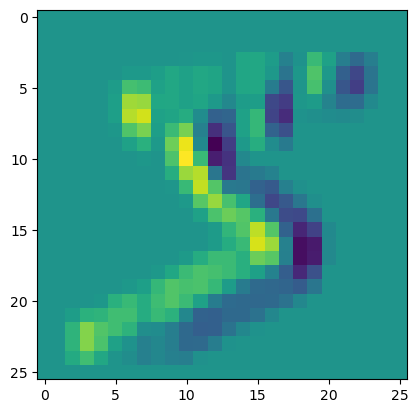

In [44]:
def plot_convolution(image, filter):
    with torch.no_grad():
        filter_tensor = torch.tensor(filter).type(torch.float)
        c = Conv2d(1, 1, (3, 3))
        c.weight.copy_(filter_tensor)
        image = torch.unsqueeze(image, dim=0)
        print(image.shape)
        image_conv = c(image)
        plt.imshow(image_conv[0][0])
plot_convolution(train_data[0][0], [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])


First filter is called a **vertical edge filter**, and it is defined by the following matrix:
$$
\left(
    \begin{matrix}
     -1 & 0 & 1 \cr
     -1 & 0 & 1 \cr
     -1 & 0 & 1 \cr
    \end{matrix}
\right)
$$
When this filter goes over relatively uniform pixel field, all values add up to 0. However, when it encounters a vertical edge in the image, high spike value is generated. That's why in the images above you can see vertical edges represented by high and low values, while horizontal edges are averaged out.

An opposite thing happens when we apply horizontal edge filter - horizontal lines are amplified, and vertical are averaged out.

> If we apply $3\times3$ filter to an image of size $28\times28$ - the size of the image will become $26\times26$, because the filter does not go over the image boundaries. In some cases, however, we may want to keep the size of the image the same, in which case image is padded with zeros on each side.

In classical computer vision, multiple filters were applied to the image to generate features, which then were used by machine learning algorithm to build a classifier. However, in deep learning we construct networks that **learn** best convolutional filters to solve classification problem.

To do that, we introduce **convolutional layers**.

## Covolutional layers

Convolutional layers are defined using `nn.Conv2d` construction. We need to specify the following:
* `in_channels` - number of input channels. In our case we are dealing with a grayscale image, thus number of input channels is 1. Color image has 3 channels (RGB).
* `out_channels` - number of filters to use. We will use 9 different filters, which will give the network plenty of opportunities to explore which filters work best for our scenario.
* `kernel_size` is the size of the sliding window. Usually 3x3 or 5x5 filters are used. The choice of filter size is usually chosen by experiment, that is by trying out different filter sizes and comparing resulting accuracy.

Simplest CNN will contain one convolutional layer. Given the input size 28x28, after applying nine 5x5 filters we will end up with a tensor of 9x24x24 (the spatial size is smaller, because there are only 24 positions where a sliding interval of length 5 can fit into 28 pixels). Here the result of each filter is represented by a different channel in the image (thus the first dimension 9 corresponds to the number of filters).

After convolution, we flatten 9x24x24 tensor into one vector of size 5184, and then add linear layer, to produce 10 classes. We also use `relu` activation function in between layers. 

In [45]:
class OneConvolutionNetwork(Module):
    def __init__(self):
        super().__init__()
        self.conv = Conv2d(in_channels=1, out_channels=9, kernel_size=(5, 5))
        self.flatten = Flatten()
        self.linear_relu_stack = Sequential(
            Linear(in_features=9*24*24, out_features=1250),
            ReLU(),
            BatchNorm1d(num_features=1250),
            Linear(in_features=1250, out_features=250),
            ReLU(),
            BatchNorm1d(num_features=250),
            Linear(in_features=250, out_features=50),
            ReLU(),
            BatchNorm1d(num_features=50),
            Linear(in_features=50, out_features=10),
            ReLU()
        )

    def forward(self, x):
        x = self.conv(x)
        x = self.flatten(x)
        x = self.linear_relu_stack(x)
        return x


In [46]:
loss_fn = CrossEntropyLoss()


In [47]:
device = "cuda" if torch.cuda.is_available() else "cpu"


In [48]:
model = OneConvolutionNetwork().to(device)


In [49]:
# hyperparameters
epoches = 1
learning_rate = 0.001
batch_size = 32

In [50]:
optimizer = Adam(model.parameters(), lr=learning_rate)


In [51]:
train_dataloader = DataLoader(train_data, batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size)


Epoch 0
--------
loss:2.289003 [0/60000]
loss:0.529765 [3200/60000]
loss:0.327403 [6400/60000]
loss:0.367213 [9600/60000]
loss:0.471451 [12800/60000]
loss:0.313607 [16000/60000]
loss:0.098108 [19200/60000]
loss:0.170728 [22400/60000]
loss:0.147120 [25600/60000]
loss:0.351253 [28800/60000]
loss:0.163313 [32000/60000]
loss:0.111899 [35200/60000]
loss:0.070030 [38400/60000]
loss:0.143308 [41600/60000]
loss:0.147397 [44800/60000]
loss:0.282479 [48000/60000]
loss:0.133833 [51200/60000]
loss:0.275711 [54400/60000]
loss:0.088340 [57600/60000]
Test Error: 
 Accuracy: 0.954300, Avg loss: 0.004663 



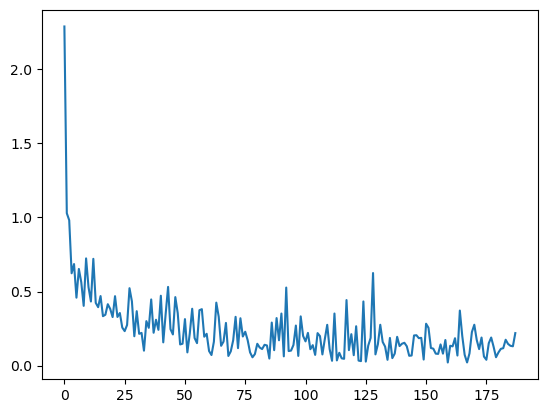

In [52]:
losses = []
for epoch in range(epoches):
    print("Epoch %d" % epoch)
    print("--------")
    size_train_data = len(train_dataloader.dataset)
    for num_batch, (x, y) in enumerate(train_dataloader):
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        pred = model(x)
        loss = loss_fn(pred, y)
        loss.backward()
        optimizer.step()

        loss_float = loss.item()
        if num_batch % 100 == 0:
            current = num_batch*batch_size
            print("loss:%f [%d/%d]" % (loss_float, current, size_train_data))
        if (num_batch % 10 == 0):
            losses.append(loss_float)

    size_test_data = len(test_dataloader.dataset)
    test_loss, accuracy = 0, 0
    for (x, y) in test_dataloader:
        x, y = x.to(device), y.to(device)
        pred = model(x)
        loss = loss_fn(pred, y)
        test_loss += loss.item()
        pred = torch.softmax(pred, dim=1)
        accuracy += (pred.argmax(dim=1) ==
                     y).type(torch.float).sum().item()

    test_loss /= size_test_data
    accuracy /= size_test_data
    print("Test Error: \n Accuracy: %f, Avg loss: %f \n" %
          (accuracy, test_loss))

plt.plot(np.squeeze(losses))

In [53]:
%reset -f

# Train multi-layer convolutional neural network

## Multi-Layered CNNs

In the previous unit we have learned about convolutional filters that can extract patterns from images. For our MNIST classifier we used 9 5x5 filters, resulting in 9x24x24 tensor.

We can use the same idea of convolution to extract higher-level patterns in the image. For example, rounded edges of digits such as 8 and 9 can be composed from a number of smaller strokes. To recognize those patterns, we can build another layer of convolution filters on top of the result of the first layer.

In [54]:
import torch
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torch.nn import Module, Conv2d, MaxPool2d, Sequential, Flatten, Linear, ReLU, BatchNorm1d, BatchNorm2d, CrossEntropyLoss
from torch.optim import Adam

import numpy as np
import matplotlib.pyplot as plt

In [55]:
device="cuda" if torch.cuda.is_available() else "cpu"

In [56]:
# hyper parameters
epoches = 1
learning_rate = 0.001
batch_size = 32


In [57]:
train_data = MNIST(root="data", train=True,
                   transform=ToTensor(), download=True)
test_data = MNIST(root="data", train=False,
                  transform=ToTensor(), download=True)

print(train_data.data.shape)
print(train_data.targets.shape)

train_dataloader = DataLoader(train_data, batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size)


torch.Size([60000, 28, 28])
torch.Size([60000])


## Pooling layers

First convolutional layers looks for primitive patterns, such as horizontal or vertical lines. Next level of convolutional layers on top of them look for higher-level patterns, such as primitive shapes. More convolutional layers can combine those shapes into some parts of the picture, up to the final object that we are trying to classify. This creates a hierarchy of extracted patterns.

When doing so, we also need to apply one trick: reducing the spatial size of the image. Once we have detected there is a horizontal stoke within a sliding window, it is not so important at which exact pixel it occurred. Thus we can "scale down" the size of the image, which is done using one of the **pooling layers**:

 * **Average Pooling** takes a sliding window (for example, 2x2 pixels) and computes an average of values within the window
 * **Max Pooling** replaces the window with the maximum value. The idea behind max pooling is to detect a presence of a certain pattern within the sliding window.

<img alt="Max Pooling" src="images/5-multilayer-convolutions-1.png" width="50%"/>

Thus, in a typical CNN there would be composed of several convolutional layers, with pooling layers in between them to decrease dimensions of the image. We would also increase the number of filters, because as patterns become more advanced - there are more possible interesting combinations that we need to be looking for.

![An image showing several convolutional layers with pooling layers.](images/5-multilayer-convolutions-2.png)

Because of decreasing spatial dimensions and increasing feature/filters dimensions, this architecture is also called **pyramid architecture**. 

In the next example, we will use two-layered CNN:

In [58]:
class MultiLayerCNN(Module):
    def __init__(self):
        super().__init__()
        self.conv_laer = Sequential(
            Conv2d(in_channels=1, out_channels=16,
                   kernel_size=(3, 3), padding="same"),
            ReLU(),
            BatchNorm2d(num_features=16),
            MaxPool2d((2, 2)),
            Conv2d(in_channels=16, out_channels=256,
                   kernel_size=(3, 3), padding="same"),
            ReLU(),
            BatchNorm2d(num_features=256),
            MaxPool2d((2, 2)),
        )
        self.fc_layer = Sequential(
            Flatten(),
            Linear(in_features=256*7*7, out_features=16*7*7),
            ReLU(),
            BatchNorm1d(num_features=16*7*7),
            Linear(in_features=16*7*7, out_features=7*7),
            ReLU(),
            BatchNorm1d(num_features=7*7),
            Linear(in_features=7*7, out_features=10),
            ReLU()
        )

    def forward(self, x):
        x = self.conv_laer(x)
        x = self.fc_layer(x)
        return x


In [59]:
loss_fn = CrossEntropyLoss()


In [60]:
model = MultiLayerCNN().to(device)


In [61]:
optimizer = Adam(model.parameters(), lr=learning_rate)


Epoch 0
--------
loss:2.332371 [0/60000]
loss:0.254372 [3200/60000]
loss:0.103794 [6400/60000]
loss:0.163144 [9600/60000]
loss:0.054367 [12800/60000]
loss:0.051480 [16000/60000]
loss:0.095887 [19200/60000]
loss:0.164278 [22400/60000]
loss:0.015248 [25600/60000]
loss:0.198701 [28800/60000]
loss:0.122852 [32000/60000]
loss:0.039986 [35200/60000]
loss:0.028937 [38400/60000]
loss:0.028215 [41600/60000]
loss:0.032894 [44800/60000]
loss:0.056618 [48000/60000]
loss:0.093686 [51200/60000]
loss:0.254010 [54400/60000]
loss:0.001933 [57600/60000]
Test Error: 
 Accuracy: 0.984300, Avg loss: 0.001602 



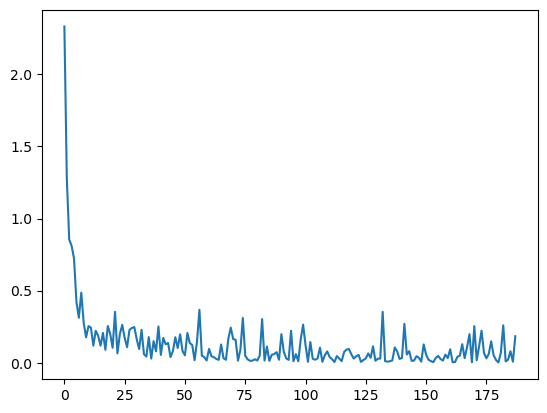

In [62]:
losses = []
for epoch in range(epoches):
    print("Epoch %d" % epoch)
    print("--------")
    size_train_data = len(train_dataloader.dataset)
    for num_batch, (x, y) in enumerate(train_dataloader):
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        pred = model(x)
        loss = loss_fn(pred, y)
        loss.backward()
        optimizer.step()

        loss_float = loss.item()
        if num_batch % 100 == 0:
            current = num_batch*batch_size
            print("loss:%f [%d/%d]" % (loss_float, current, size_train_data))
        if (num_batch % 10 == 0):
            losses.append(loss_float)

    size_test_data = len(test_dataloader.dataset)
    test_loss, accuracy = 0, 0
    for (x, y) in test_dataloader:
        x, y = x.to(device), y.to(device)
        pred = model(x)
        loss = loss_fn(pred, y)
        test_loss += loss.item()
        pred = torch.softmax(pred, dim=1)
        accuracy += (pred.argmax(dim=1) ==
                     y).type(torch.float).sum().item()

    test_loss /= size_test_data
    accuracy /= size_test_data
    print("Test Error: \n Accuracy: %f, Avg loss: %f \n" %
          (accuracy, test_loss))

plt.plot(np.squeeze(losses))

What you should probably observe is that we are able to achieve higher accuracy, and much faster - just with 1 or 2 epochs. It means that sophisticated network architecture needs much fewer data to figure out what is going on, and to extract generic patterns from our images.

In [63]:
%reset -f

## Playing with real images from the CIFAR-10 dataset

While our handwritten digit recognition problem may seem like a toy problem, we are now ready to do something more serious. Let's explore more advanced dataset of pictures of different objects, called [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html). It contains 60k 32x32 color images, divided into 10 classes. 

In [64]:
import torch
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torch.nn import Module,Conv2d,BatchNorm2d,MaxPool2d,Sequential,Flatten,Linear,ReLU,BatchNorm1d,CrossEntropyLoss
from torch.optim import Adam

import numpy as np
import matplotlib.pyplot as plt

In [65]:
device="cuda" if torch.cuda.is_available() else "cpu"

In [66]:
# hyper parameters
epoches=1
batch_size=32
learning_rate=0.001

In [67]:
# preparing data
train_data = CIFAR10(root="data", train=True,
                     transform=ToTensor(), download=True)
test_data = CIFAR10(root="data", train=False,
                    transform=ToTensor(), download=True)
train_dataloader = DataLoader(train_data, batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size)


100%|██████████| 170498071/170498071 [00:15<00:00, 10683763.78it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


torch.Size([3, 32, 32])
torch.Size([3, 32, 32])


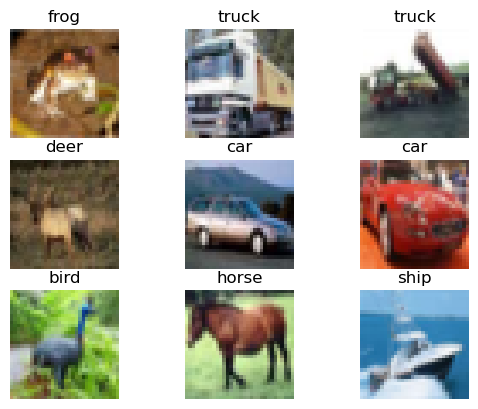

In [68]:
# Visualize data
print(train_data[0][0].shape)
print(test_data[0][0].shape)

classes = ["plane", "car", "bird", "cat", "deer",
           "dog", "frog", "horse", "ship", "truck"]

size_plt_grid = 3
fig, axs = plt.subplots(size_plt_grid, size_plt_grid)
for i in range(size_plt_grid):
    for j in range(size_plt_grid):
        img = np.transpose(train_data[i*size_plt_grid+j][0].numpy(), (1, 2, 0))
        axs[i][j].imshow(img)
        axs[i][j].set_title(classes[train_data[i*size_plt_grid+j][1]])
        axs[i][j].axis("off")


A well-known architecture for CIFAR-10 is called [LeNet](https://en.wikipedia.org/wiki/LeNet), and has been proposed by *Yann LeCun*. It follows the same principles as we have outlined above. However, since all images are color, input tensor size is $3\times32\times32$, and the $5\times5$ convolutional filter is applied across color dimension as well - meaning that the size of convolution kernel matrix is $3\times5\times5$. 

We also do one more simplification to this model - we do not use `log_softmax` as output activation function, and just return the output of last fully-connected layer. In this case we can just use `CrossEntropyLoss` loss function to optimize the model.

In [69]:
class LeNet(Module):
    def __init__(self):
        super().__init__()
        self.conv_layer = Sequential(
            Conv2d(in_channels=3, out_channels=6, kernel_size=(5, 5)),
            ReLU(),
            MaxPool2d(kernel_size=(2, 2)),
            Conv2d(in_channels=6, out_channels=16, kernel_size=(5, 5)),
            ReLU(),
            MaxPool2d(kernel_size=(2, 2)),
            Conv2d(in_channels=16, out_channels=120, kernel_size=(5, 5)),
            ReLU()
        )
        self.fc_layer = Sequential(
            Flatten(),
            Linear(in_features=120, out_features=64),
            ReLU(),
            Linear(in_features=64, out_features=10)
        )
        
    def forward(self,x):
        x=self.conv_layer(x)
        x=self.fc_layer(x)
        return x


In [70]:
loss_fn=CrossEntropyLoss()

In [71]:
model=LeNet().to(device)

In [72]:
optimizer=Adam(model.parameters(),lr=learning_rate)

Epoch 0
--------
loss:2.285739 [0/50000]
loss:2.047048 [3200/50000]
loss:1.991410 [6400/50000]
loss:1.952090 [9600/50000]
loss:1.872423 [12800/50000]
loss:1.531203 [16000/50000]
loss:1.842969 [19200/50000]
loss:1.574373 [22400/50000]
loss:2.032933 [25600/50000]
loss:1.525222 [28800/50000]
loss:1.467763 [32000/50000]
loss:1.642414 [35200/50000]
loss:1.486721 [38400/50000]
loss:1.259919 [41600/50000]
loss:1.418000 [44800/50000]
loss:1.440117 [48000/50000]
Test Error: 
 Accuracy: 0.456700, Avg loss: 0.045847 



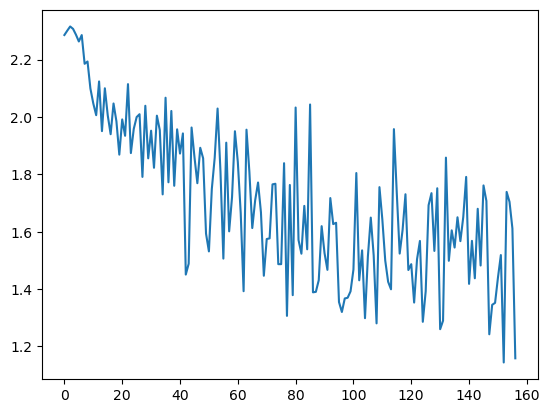

In [73]:
losses = []
for epoch in range(epoches):
    print("Epoch %d" % epoch)
    print("--------")
    size_train_data = len(train_dataloader.dataset)
    for num_batch, (x, y) in enumerate(train_dataloader):
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        pred = model(x)
        loss = loss_fn(pred, y)
        loss.backward()
        optimizer.step()

        loss_float = loss.item()
        if num_batch % 100 == 0:
            current = num_batch*batch_size
            print("loss:%f [%d/%d]" % (loss_float, current, size_train_data))
        if (num_batch % 10 == 0):
            losses.append(loss_float)

    size_test_data = len(test_dataloader.dataset)
    test_loss, accuracy = 0, 0
    for (x, y) in test_dataloader:
        x, y = x.to(device), y.to(device)
        pred = model(x)
        loss = loss_fn(pred, y)
        test_loss += loss.item()
        pred = torch.softmax(pred, dim=1)
        accuracy += (pred.argmax(dim=1) ==
                     y).type(torch.float).sum().item()

    test_loss /= size_test_data
    accuracy /= size_test_data
    print("Test Error: \n Accuracy: %f, Avg loss: %f \n" %
          (accuracy, test_loss))

plt.plot(np.squeeze(losses))


In [74]:
%reset -f

In [75]:
import torch
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torch.nn import Module,Conv2d,BatchNorm2d,MaxPool2d,Sequential,Flatten,Linear,ReLU,BatchNorm1d,CrossEntropyLoss,Dropout
from torch.optim import Adam
from torch.optim.lr_scheduler import ExponentialLR

import numpy as np
import matplotlib.pyplot as plt

In [76]:
device="cuda" if torch.cuda.is_available() else "cpu"

In [77]:
# hyper parameters
epoches=8
batch_size=16
learning_rate=0.001

In [78]:
# preparing data
train_data = CIFAR10(root="data", train=True,
                     transform=ToTensor(), download=True)
test_data = CIFAR10(root="data", train=False,
                    transform=ToTensor(), download=True)
train_dataloader = DataLoader(train_data, batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size)


Files already downloaded and verified
Files already downloaded and verified


In [79]:
class CnnForCIFAR10(Module):
    def __init__(self):
        super().__init__()
        self.conv_layer = Sequential(
            Conv2d(in_channels=3, out_channels=16,
                   kernel_size=(3, 3), padding="same"),
            ReLU(),
            BatchNorm2d(num_features=16),
            MaxPool2d(kernel_size=(2, 2)),
            Conv2d(in_channels=16, out_channels=32,
                   kernel_size=(3, 3), padding="same"),
            ReLU(),
            BatchNorm2d(num_features=32),
            MaxPool2d(kernel_size=(2, 2)),
            Conv2d(in_channels=32, out_channels=64,
                   kernel_size=(3, 3), padding="same"),
            ReLU(),
            BatchNorm2d(num_features=64),
            MaxPool2d(kernel_size=(2, 2)),
            Conv2d(in_channels=64, out_channels=128,
                   kernel_size=(3, 3), padding="same"),
            ReLU(),
            BatchNorm2d(num_features=128),
            MaxPool2d(kernel_size=(2, 2))   
        )
        self.fc_layer = Sequential(
            Flatten(),
            Linear(in_features=128*2*2, out_features=64*2*2),
            ReLU(),
            BatchNorm1d(num_features=64*2*2),
            Dropout(0.2),
            Linear(in_features=64*2*2, out_features=32*2*2),
            ReLU(),
            BatchNorm1d(num_features=32*2*2),
            Dropout(0.2),
            Linear(in_features=32*2*2,out_features=16*2*2),
            ReLU(),
            BatchNorm1d(16*2*2),
            Dropout(0.2),
            Linear(in_features=16*2*2,out_features=10),
            ReLU()
        )

    def forward(self, x):
        x = self.conv_layer(x)
        x = self.fc_layer(x)
        return x


In [80]:
loss_fn=CrossEntropyLoss()

In [81]:
model = CnnForCIFAR10().to(device)


In [82]:
optimizer = Adam(model.parameters(), lr=learning_rate)


In [83]:
scheduler = ExponentialLR(optimizer, gamma=0.9)


Epoch 0
--------
loss:2.414804 [0/50000]
loss:2.136757 [1600/50000]
loss:2.162699 [3200/50000]
loss:1.720840 [4800/50000]
loss:1.791669 [6400/50000]
loss:2.127522 [8000/50000]
loss:1.931706 [9600/50000]
loss:2.007798 [11200/50000]
loss:1.350898 [12800/50000]
loss:1.536024 [14400/50000]
loss:1.429228 [16000/50000]
loss:1.310761 [17600/50000]
loss:1.633244 [19200/50000]
loss:1.662804 [20800/50000]
loss:1.751478 [22400/50000]
loss:1.139981 [24000/50000]
loss:1.877923 [25600/50000]
loss:1.641476 [27200/50000]
loss:1.604607 [28800/50000]
loss:1.209815 [30400/50000]
loss:1.406170 [32000/50000]
loss:1.419221 [33600/50000]
loss:1.490200 [35200/50000]
loss:1.277076 [36800/50000]
loss:1.414076 [38400/50000]
loss:1.539528 [40000/50000]
loss:0.920731 [41600/50000]
loss:1.382352 [43200/50000]
loss:1.031816 [44800/50000]
loss:1.655450 [46400/50000]
loss:1.337822 [48000/50000]
loss:1.002570 [49600/50000]
Test Error: 
 Accuracy: 0.520000, Avg loss: 0.085161 

Epoch 1
--------
loss:1.107273 [0/50000]
l

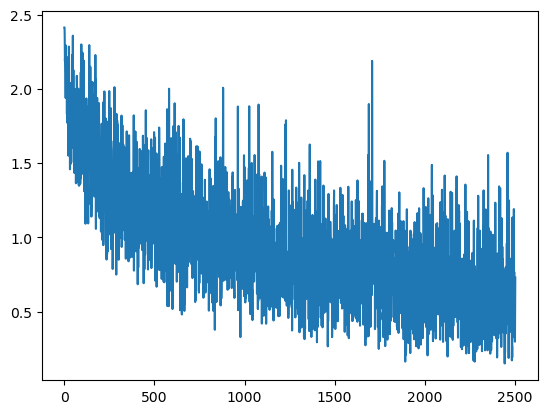

In [84]:
losses = []
for epoch in range(epoches):
    print("Epoch %d" % epoch)
    print("--------")
    size_train_data = len(train_dataloader.dataset)
    for num_batch, (x, y) in enumerate(train_dataloader):
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        pred = model(x)
        loss = loss_fn(pred, y)
        loss.backward()
        optimizer.step()

        loss_float = loss.item()
        if num_batch % 100 == 0:
            current = num_batch*batch_size
            print("loss:%f [%d/%d]" % (loss_float, current, size_train_data))
        if (num_batch % 10 == 0):
            losses.append(loss_float)
    scheduler.step()

    size_test_data = len(test_dataloader.dataset)
    test_loss, accuracy = 0, 0
    for (x, y) in test_dataloader:
        x, y = x.to(device), y.to(device)
        pred = model(x)
        loss = loss_fn(pred, y)
        test_loss += loss.item()
        # pred = torch.softmax(pred, dim=1)
        accuracy += (pred.argmax(dim=1) ==
                     y).type(torch.float).sum().item()

    test_loss /= size_test_data
    accuracy /= size_test_data
    print("Test Error: \n Accuracy: %f, Avg loss: %f \n" %
          (accuracy, test_loss))

plt.plot(np.squeeze(losses))


In [85]:
%reset -f